In [2]:
from transformers import GPT2LMHeadModel

c:\Users\Brijesh\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [4]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

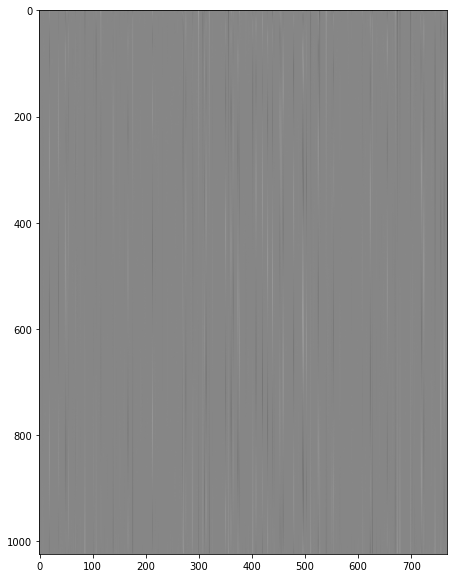

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")

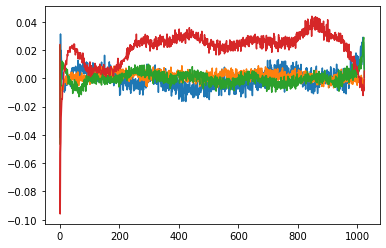

In [12]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 10])
plt.plot(sd_hf["transformer.wpe.weight"][:, 100])
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

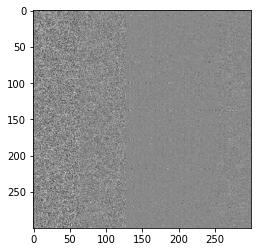

In [9]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap="gray")

In [16]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_new_tokens=30, num_return_sequences=5)

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, so that's a hard one, but let's see how we can achieve it!\n\nYou can learn more about this topic in this talk —"},
 {'generated_text': "Hello, I'm a language model, and I want to learn more about the basics of programming. There are quite a few things that are unique about programming languages. The concepts that you learn"},
 {'generated_text': 'Hello, I\'m a language model, I\'m a model of the world."\n\n"Are you using the same kind of language that you use?" asked Rika.\n\n"'},
 {'generated_text': "Hello, I'm a language model, and I'm trying to understand how people are able to understand them and be able to understand how it works in a way that's easy to understand for"},
 {'generated_text': 'Hello, I\'m a language model, it\'s called a model. But I don\'t really understand them yet."\n\n"Okay."\n\n"We\'ll see how long we can'}]